In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pop_est = pd.read_csv('data/nst-est2018-alldata.csv')
pop_est.head(3)

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833


In [3]:
pop_est_tn = pop_est.loc[pop_est.NAME == 'Tennessee']

In [4]:
pop_est_tn = pop_est_tn[['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
                        'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
                        'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018']]
pop_est_tn

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
47,6355301,6397410,6451281,6493432,6540826,6590808,6645011,6708794,6770010


In [5]:
melted_tn_pop = pop_est_tn.melt()
melted_tn_pop.columns = ['month_year', 'estimate']

In [6]:
melted_tn_pop.month_year = 'Jul-' + melted_tn_pop.month_year.str[11:]
melted_tn_pop.estimate = melted_tn_pop.estimate/1000
melted_tn_pop.head(2)

,month_year,estimate
0,Jul-2010,6355.301
1,Jul-2011,6397.410


In [7]:
jobs = pd.read_excel('data/SWXX 2019--jobs.xlsm', 'Jobs', na_values = '*')
jobs.head(3)

,seasonal,year,super,month,United States,Alabama,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Unnamed: 56
0,S,1990,Total Nonfarm,January,109197.0,1636.8,230.8,1473.4,912.5,12495.2,...,2191.7,7028.6,712.5,261.5,2901.5,2122.2,606.9,2268.7,195.7,NaN
1,S,1990,Total Nonfarm,February,109435.0,1634.9,233.0,1475.8,912.3,12500.7,...,2195.1,7038.5,712.8,260.1,2907.6,2126.1,607.4,2278.7,196.3,NaN
2,S,1990,Total Nonfarm,March,109644.0,1633.0,235.4,1478.5,915.6,12503.6,...,2199.4,7057.6,715.6,259.9,2911.3,2131.1,611.9,2280.6,197.5,NaN


In [8]:
tn_jobs = jobs[['seasonal', 'year', 'super', 'month', 'Tennessee']]
tn_jobs.head(3)

,seasonal,year,super,month,Tennessee
0,S,1990,Total Nonfarm,January,2191.7
1,S,1990,Total Nonfarm,February,2195.1
2,S,1990,Total Nonfarm,March,2199.4


In [9]:
tn_jobs = tn_jobs.loc[tn_jobs.year.isin(['2010', '2011', '2012', '2013',
                                        '2014', '2015', '2016', '2017', 
                                         '2018'])]
tn_jobs.shape

(4914, 5)

In [10]:
tn_nonfarm = tn_jobs.loc[tn_jobs.super == 'Total Nonfarm']
tn_nonfarm.shape

(234, 5)

In [11]:
tn_nonfarm['month_year'] = tn_nonfarm.month.str[0:3] + '-' + tn_nonfarm.year.astype(str)
tn_nonfarm.head(3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,seasonal,year,super,month,Tennessee,month_year
260,S,2010,Total Nonfarm,January,2596.7,Jan-2010
261,S,2010,Total Nonfarm,February,2592.7,Feb-2010
262,S,2010,Total Nonfarm,March,2596.2,Mar-2010


In [12]:
tn_nonfarm = tn_nonfarm.rename(columns = {'Tennessee': 'job_count'})

In [13]:
tn_nonfarm.job_count = tn_nonfarm.job_count.astype(float)

In [14]:
tn_nonfarm = tn_nonfarm.loc[tn_nonfarm.month != 'Annual']

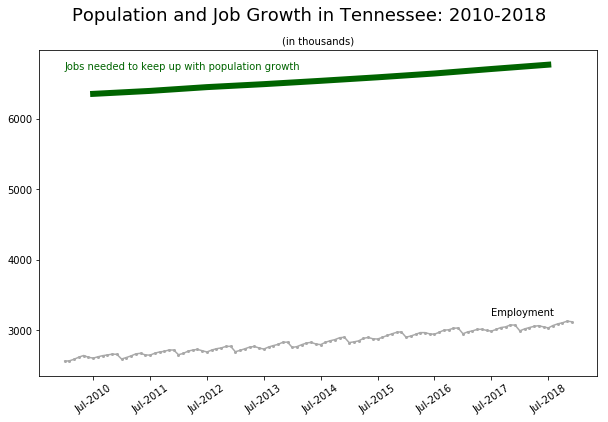

In [16]:
seasonal = tn_nonfarm.loc[tn_nonfarm.seasonal == 'S']
nonseasonal = tn_nonfarm.loc[tn_nonfarm.seasonal == 'U']

plt.figure(figsize = (10, 6))
plt.plot('month_year', 'job_count', marker = 'o', markersize = 2, 
         data = nonseasonal, color = 'darkgray')
plt.plot('month_year', 'estimate', data = melted_tn_pop, color = 'darkgreen', linewidth = 6)
plt.annotate(s='Employment', xy = (90, 3200))
plt.annotate(s='Jobs needed to keep up with population growth', xy = (0, 6700), color = 'darkgreen')
plt.suptitle('Population and Job Growth in Tennessee: 2010-2018', fontsize = 18)
plt.title('(in thousands)', fontsize = 10)
plt.xticks(['Jul-2010', 'Jul-2011', 'Jul-2012', 'Jul-2013', 'Jul-2014',
            'Jul-2015', 'Jul-2016', 'Jul-2017', 'Jul-2018'], rotation = 35)
plt.savefig('population_and_jobs.png');